In [1]:
from alinea.adel.adel_dynamic import AdelDyn
from alinea.adel.mtg_editions import find_metamers, add_plant, add_vegetative_metamer, new_mtg_factory, update_organ_elements, add_axe
from alinea.adel.mtg_interpreter import mtg_interpreter, transform_geom

from openalea.plantgl.all import Viewer, Scene
from openalea.mtg import MTG
from alinea.adel.geometric_elements import Leaves
from alinea.adel.newmtg import internode_elements, sheath_elements, blade_elements, convert, properties_from_dict, adel_metamer
import pandas as pd

import os
import random
import warnings
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from alinea.adel.Stand import AgronomicStand
from alinea.adel.echap_leaf import echap_leaves
from fspmwheat import caribu_facade
from fspmwheat import cnwheat_facade
from fspmwheat import elongwheat_facade
from fspmwheat import farquharwheat_facade
from fspmwheat import fspmwheat_facade
from fspmwheat import growthwheat_facade
from fspmwheat import senescwheat_facade

In [2]:
PLANT_DENSITY = {1: 200.}
INTER_ROW = 0.15
stand = AgronomicStand(sowing_density=PLANT_DENSITY[1], plant_density=PLANT_DENSITY[1], inter_row=INTER_ROW, noise=0.)
adel_wheat = AdelDyn(nplants=1, duplicate=None, seed=1234, scene_unit='m', stand=stand, aspect='smart')
g = adel_wheat.load(dir='./outputs')


In [5]:
2500/24/30

3.4722222222222223

In [8]:
g.node(162).properties()

{'edge_type': '<',
 'label': 'internode',
 'azimuth': 182.1112122,
 'age': 0.0,
 'length': 0.025513095483411498,
 'ntop': 40,
 'visible_length': 0.0,
 'senesced_length': 0,
 'diameter': 0.004489903,
 'inclination': 0,
 'area': 0.0}

In [3]:
g.display()

MTG : nb_vertices=183, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
^<HiddenElement			(id=108)											
^<StemElement			(id=107)											
^<topElement			(id=10)											
	+sheath			(id=11)										
	^/baseElement			(id=12)										
	^<HiddenElement			(id=110)										
	^<StemElement			(id=109)										
	^<topElement			(id=13)										
	^<blade			(id=14)										
	^/baseElement			(id=15)										
	^<HiddenElement			(id=111)										
	^<LeafElement1			(id=157)										
	^<topElement			(id=16)										
^<metamer2			(id=17)											
^/internode			(id=18)											
^/baseElement			(id=19)											
^<HiddenElement			(id=113)											
^<StemElement			(id=112)											
^<topElement			(id=20)											
	+sheath			(id=21)									

In [3]:
from openalea.plantgl.all import Viewer, Scene
adel_wheat.plot(g)
Viewer.waitSelection()

0

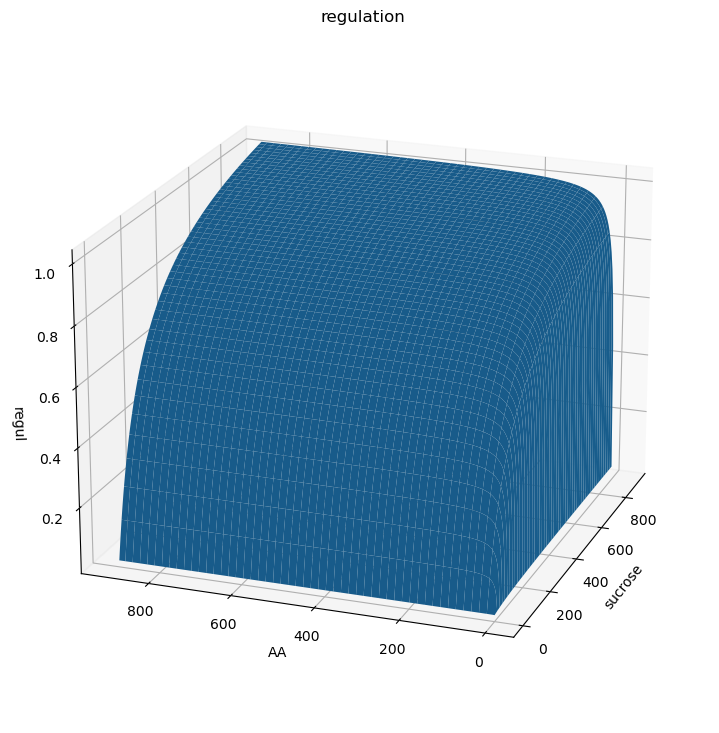

In [7]:
leaf_pseudo_age_Vmax = 1.2
leaf_pseudo_age_Kc = 150
leaf_pseudo_age_Kn = 4
conc_sucrose_effective = np.linspace(0.1, 900, 300)
conc_amino_acids = np.linspace(0.1,900,300)

sucroses_grid, amino_acids_grid= np.meshgrid(conc_sucrose_effective, conc_amino_acids, indexing='xy')

@np.vectorize
def caller(sucr, aa):
    return leaf_pseudo_age_Vmax / (1 + leaf_pseudo_age_Kc / sucr) / (1 + leaf_pseudo_age_Kn / aa)

from cnwheat import model as cnwheat_model, parameters as cn_pars
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

test_responses = caller(sucroses_grid, amino_acids_grid)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(sucroses_grid, amino_acids_grid, test_responses)
ax.set_title('regulation')
ax.set_xlabel('sucrose')
ax.set_ylabel('AA')
ax.set_zlabel('regul')
ax.view_init(azim=200, elev=20)

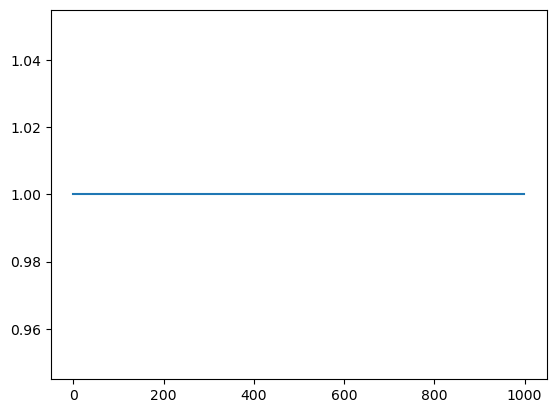

In [29]:
from elongwheat import parameters
@np.vectorize
def Beta_function(leaf_pseudo_age):
    """ Normalized leaf length from the emergence of the previous leaf to the end of elongation (automate function depending on leaf pseudo age).

    :param float leaf_pseudo_age: Pseudo age of the leaf since beginning of automate elongation (s)

    :return: Normalized leaf length (m)
    :rtype: float
    """

    return abs((1 + (max(0, (parameters.te - leaf_pseudo_age)) / (parameters.te - parameters.tm))) *
               (min(1.0, float(leaf_pseudo_age - parameters.tb) / float(parameters.te - parameters.tb)) **
                ((parameters.te - parameters.tb) / (parameters.te - parameters.tm))))

age = np.linspace(5E6, 1E7, 1000)
plt.plot(Beta_function(age))

In [2]:
PLANT_DENSITY = {1: 250.}
INTER_ROW = 0.15
INPUTS_DIRPATH = r'C:\Users\gyoso.cho.TIRD\source\WheatFspm\WheatFspm\fspm-wheat\example\Scenarios_monoculms\outputs'
# Create the stand using density pattern
stand = AgronomicStand(sowing_density=PLANT_DENSITY[1], plant_density=PLANT_DENSITY[1], inter_row=INTER_ROW, noise=0.)
# Create AdelDyn object and empty mtg
adel_wheat = AdelDyn(seed=1, scene_unit='m', leaves=echap_leaves(xy_model='Soissons_byleafclass', top_leaves=0), stand=stand)
g = adel_wheat.load(dir=INPUTS_DIRPATH)

In [15]:
g.display()

MTG : nb_vertices=175, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
^<HiddenElement			(id=108)											
^<StemElement			(id=107)											
^<topElement			(id=10)											
	+sheath			(id=11)										
	^/baseElement			(id=12)										
	^<HiddenElement			(id=110)										
	^<StemElement			(id=109)										
	^<topElement			(id=13)										
	^<blade			(id=14)										
	^/baseElement			(id=15)										
	^<HiddenElement			(id=111)										
	^<LeafElement1			(id=157)										
	^<topElement			(id=16)										
^<metamer2			(id=17)											
^/internode			(id=18)											
^/baseElement			(id=19)											
^<HiddenElement			(id=113)											
^<StemElement			(id=112)											
^<topElement			(id=20)											
	+sheath			(id=21)									

In [3]:
g = adel_wheat.update_geometry(g)
adel_wheat.plot(g)
Viewer.waitSelection()

0

# TAKAHASHI (2005) paper experiment

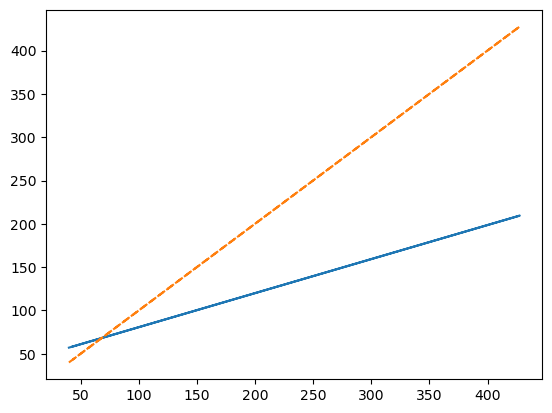

In [5]:
Sn = lambda Lmax_n: 41.4+0.393*Lmax_n
plt.plot([Ln(r) for r in rank], [Sn(Ln(r)) for r in rank])
plt.plot([Ln(r) for r in rank],[Ln(r) for r in rank],'--')

In [20]:
Sn(65)

66.945

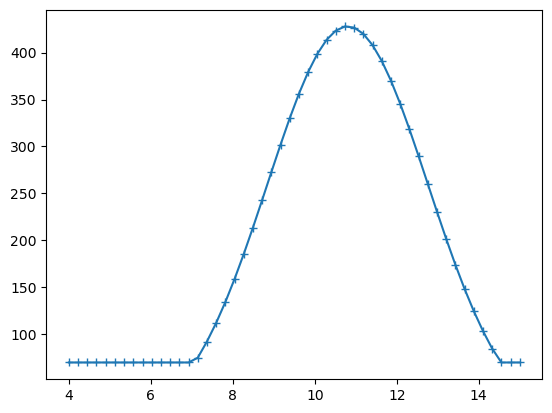

In [14]:
Lmax = 428
nmax = 10.8
d = 3.84
Ln = lambda n: np.max([Lmax*np.exp((-(n-nmax)**2)/(2*d)), 70])
    
rank = np.linspace(4,15)
plt.plot(rank, [Ln(r) for r in rank] , "-+")

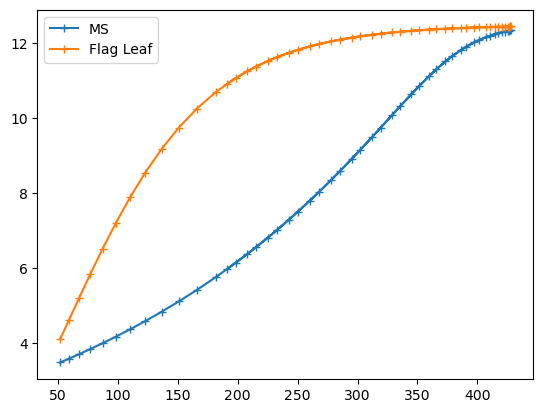

In [3]:
Wp = 12.5
b = 16.19
c = 0.0424
d = 10.96
W = lambda Lm: Wp/(1+np.exp(b-c*Lm))**(1/d)
rank = np.linspace(4,15)
plt.plot(Ln(rank), W(Ln(rank)) , "-+")
leaf_rank_length = dict((key, value) for key, value in zip(rank, Ln(rank)))
leaf_rank_width = dict((key, value) for key, value in zip(rank, W(Ln(rank))))

Flag_Wp = 12.5
Flag_b = -4.14
Flag_c = 0.0152
Flag_d = 0.00647
Flag_W = lambda Lm: Flag_Wp/(1+np.exp(Flag_b-Flag_c*Lm))**(1/Flag_d)
plt.plot(Ln(rank), Flag_W(Ln(rank)) , "-+")
plt.legend(['MS', 'Flag Leaf'])

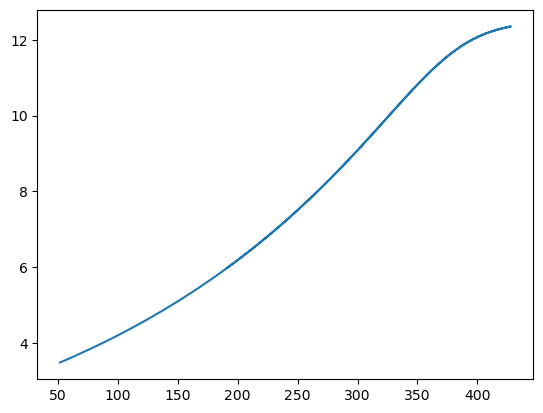

In [9]:
rank = np.linspace(4,15)
plt.plot(Ln(rank), W(Ln(rank)))

In [33]:
rank_theta01 = {3:40, 4:30, 5:39, 6:38, 7:29, 8:28, 7:15, 8:20, 9:15, 10:16, 11:18} # according to Fig.5
rank_theta03 = {rank: 81.7*(1-np.exp(-0.0379*theta)) for rank, theta in zip(rank_theta01.keys(), rank_theta01.values())}
rank_theta02 = {rank: 2*(theta3-theta1) for rank, theta1, theta3 in zip(rank_theta01.keys(), rank_theta01.values(), rank_theta03.values())}


20


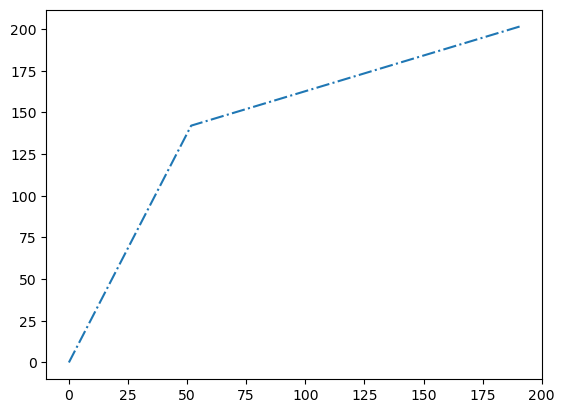

In [90]:
def leaf_rank_selector(in_key):
    return list(leaf_rank_length.keys())[np.argmin(abs(np.array(list(leaf_rank_length.keys()))-in_key))]

leaf_rank = 8
print(rank_theta01[leaf_rank])
length = leaf_rank_length[leaf_rank_selector(leaf_rank)]
x1 = length/2*np.sin(np.deg2rad(rank_theta01[leaf_rank]))
y1 = length/2*np.cos(np.deg2rad(rank_theta01[leaf_rank]))
hypotenuse = np.sqrt(   2*(length/2)**2-2*(length/2)**2*np.cos( np.pi-2*np.deg2rad( (rank_theta03[leaf_rank]-rank_theta01[leaf_rank]) ) ) )
x2 = hypotenuse*np.sin(np.deg2rad(rank_theta03[leaf_rank]))
y2 = hypotenuse*np.cos(np.deg2rad(rank_theta03[leaf_rank]))
points = [(0,0), (x1, y1),  (x2, y2)]
plt.plot(list(zip(*points))[0], list(zip(*points))[1] ,'-.')

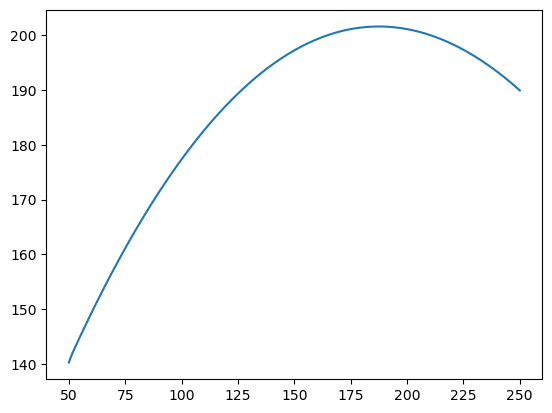

In [121]:
from scipy.interpolate import CubicHermiteSpline as CHS
chs = CHS(list(zip(*points))[0], list(zip(*points))[1], dydx = [1.1, 0.9, -0.02])
xcoord = np.linspace(50,250,500)
plt.plot(xcoord, chs(xcoord))

In [3]:
PLANT_DENSITY = {1: 250.}
INTER_ROW = 0.15
INPUTS_DIRPATH = 'inputs'
# Create the stand using density pattern
stand = AgronomicStand(sowing_density=PLANT_DENSITY[1], plant_density=PLANT_DENSITY[1], inter_row=INTER_ROW, noise=0.)

# Create AdelDyn object and empty mtg
adel_wheat = AdelDyn(seed=1, scene_unit='m', stand=stand)
axeT_df = pd.read_csv(os.path.join(INPUTS_DIRPATH, 'axeTable_with_tiller.csv'))

In [3]:
g = MTG()
for i, plant in axeT_df.groupby('plant'):
    plant_properties = {'position': adel_wheat.positions[0],
                        'azimuth': adel_wheat.plant_azimuths[0],
                        'refplant_id': 0}
    
    ms = plant.loc[plant['axe'] == 'MS', :].to_dict('list')
    ms_properties = {'HS_final': float(ms['HS_final'][0]),
                     'nff': int(ms['nf'][0]),
                     'hasEar': bool(int(ms['hasEar'][0])),
                     'azimuth': 0}
    add_plant(g, i, plant_properties=plant_properties, axis_properties=ms_properties,)

In [4]:
phytoT_df = pd.read_csv(os.path.join('inputs', 'phytoT_with_tiller.csv'))

In [30]:
adel_wheat.add_metamer(g, phytoT_df, axe='MS')

108

In [10]:
adel_wheat.add_metamer(g, phytoT_df, axe='MS')

52

In [11]:
for i, plant in axeT_df.groupby('plant'):
    tiller = plant.loc[plant['axe']=='T1', :].to_dict('list')
    t_properties = {'HS_final': float(tiller['HS_final'][0]),
                     'nff': int(tiller['nf'][0]), 'hasEar': bool(int(tiller['hasEar'][0])),'azimuth': 0, 'inclination': 10}
    
    add_axe(g, 'T1', axis_properties=t_properties)
    

In [33]:
adel_wheat.add_metamer(g, phytoT_df, axe='T1')

123

In [22]:
g.node(33).properties()

{'edge_type': '<',
 'label': 'internode',
 'azimuth': 183.6433947,
 'ntop': 9,
 'length': 2,
 'visible_length': 2,
 'senesced_length': 0,
 'diameter': 0.05,
 'inclination': 0,
 'shape_mature_length': 1.0,
 'area': 0.3141592653589793}

In [16]:
g.display()

MTG : nb_vertices=108, nb_scales=6
/plant1			(id=1)											
^/MS			(id=2)											
^/metamer0			(id=3)											
^/collar			(id=4)											
^/baseElement			(id=5)											
^<topElement			(id=6)											
^<metamer1			(id=7)											
^/internode			(id=8)											
^/baseElement			(id=9)											
	+T1			(id=27)										
	^/metamer0			(id=28)										
	^/collar			(id=29)										
	^/baseElement			(id=30)										
	^<topElement			(id=31)										
	^<metamer1			(id=32)										
	^/internode			(id=33)										
	^/baseElement			(id=34)										
	^<HiddenElement			(id=85)										
	^<StemElement			(id=84)										
	^<topElement			(id=35)										
		+sheath			(id=36)									
		^/baseElement			(id=37)									
		^<HiddenElement			(id=87)									
		^<StemElement			(id=86)									
		^<topElement			(id=38)									
		^<blade			(id=39)									
		^/baseElement			(id=40)									
		^<HiddenElement			(id=89)									
		^<LeafElement1			(id=88)									
		^<topElement			(i

In [34]:
for vid in g.property('visible_length'):
    if g.node(vid).label.startswith('blade'):
        g.property('visible_length')[vid] = 1.2
    elif g.node(vid).label.startswith('internode'):
        g.property('visible_length')[vid] = 2
        
for vid in g.property('length'):
    if g.node(vid).label.startswith('blade'):
        g.property('length')[vid] = 1.2
        g.property('shape_mature_length')[vid] = 1.5
        g.property('shape_max_width')[vid] = 0.08
    elif g.node(vid).label.startswith('internode'):
        g.property('length')[vid] = 2
        g.property('shape_mature_length')[vid] = 1.0
        g.property('diameter')[vid] = 0.05
        
for vid in g.property('inclination'):
    if g.node(vid).label.startswith('blade'):
        g.property('inclination')[vid] = 0
        
for vid in g.property('senesced_length'):
    if g.node(vid).label.startswith('internode'):
        g.property('senesced_length')[vid] = 0
    elif g.node(vid).label.startswith('blade'):
        g.property('senesced_length')[vid] = 0
        
for vid in g.property('rolled_length'):
    if g.node(vid).label.startswith('internode'):
        g.property('rolled_length')[vid] = 0
    elif g.node(vid).label.startswith('blade'):
        g.property('rolled_length')[vid] = 0

In [35]:
g.property('inclination')[33] = 30

In [36]:
adel_wheat.update_geometry(g)

In [37]:
from openalea.plantgl.all import Viewer, Scene
adel_wheat.plot(g)
Viewer.waitSelection()

0

In [5]:
axeT_df

,HS_final,axe,azT,azTb,disp,dredT,emf1,end,hasEar,incT,nf,nf_end,plant
0,12,MS,158.446716,0,NaN,0,21.543097,NaN,1,1.599404,12,12,1
1,9,T1,90.000000,0,NaN,0,18.543097,NaN,1,50.000000,9,9,1


# Plantgl Exercise

In [1]:
import numpy as np
from openalea.plantgl.all import *

In [2]:
def quad_cyl(radius, height, slices = 12):
    points = []
    indices = []
    for i in range(slices):
        points += [(radius*np.cos(2*i*np.pi/slices), radius*np.sin(2*i*np.pi/slices), 0),
                   (radius*np.cos(2*i*np.pi/slices), radius*np.sin(2*i*np.pi/slices), height)]
        
        if i is not (slices-1):
            indices += [(2*i, 2*i+1, 2*i+3, 2*i+2)]
        else:
            indices += [(2*i, 2*i+1, 1, 0)]
            
    cyl = QuadSet(points, indices)
    return cyl

In [4]:
cyl1 = quad_cyl(1,4)
cyl2 = Translated(-4,0,0,quad_cyl(1,4,6))
cyl3 = Translated(4,0,0, quad_cyl(1,4,3))

m1 = Material(Color3(150,0,0))
m2 = Material(Color3(0,150,0))
m3 = Material(Color3(0,0,150))

shapes = [Shape(cyl1, m1), Shape(cyl2,m2), Shape(cyl3, m3)]
Viewer.display(Scene(shapes))
Viewer.waitSelection()

257

# Caribu Exercise

In [1]:
import openalea.plantgl.all as pgl
from alinea.caribu.CaribuScene import CaribuScene
from alinea.caribu.data_samples import data_path

In [2]:
can = str(data_path('f331s1_100plantes.can'))
sky = str(data_path('Turtle16soc.light'))
opts = list(map(str, [data_path('par.opt'), data_path('nir.opt')]))

In [3]:
cs = CaribuScene(scene=can, light=sky, opt=opts, debug=True)#, pattern=(xs_min-5, ys_min-5, xs_max+5, ys_max+5))

In [6]:
# extract the domain of the current scene.
import numpy as np
xs_min = ys_min = np.inf
xs_max = ys_max = -np.inf
for element in list(cs.scene.values()):
    for primitive in element:
        xs,ys,zs = list(zip(*primitive))
        if xs_min>np.min(xs):
            xs_min = np.min(xs)
        if ys_min>np.min(ys):
            ys_min = np.min(ys)
        if xs_max<np.max(xs):
            xs_max = np.max(xs)
        if ys_max<np.max(ys):
            ys_max = np.max(ys)

In [4]:
raw,agg=cs.run(simplify=True, direct=True, infinite=False)

Prepare scene 16
done

 >>>> Caribu.__init__ starts...


 <<<< Caribu.__init__ ends...


 >>>> Caribu.run() starts...


>>> Caribu state in  Caribu::init()
<<<<


band0
>>> Canestrad(): canestrad -M cscene.can -l sky.light -p band0.opt -A   -1     -L 1536  
>>> caribu.py: Caribu::canestra (band0) finished !

 <<<< Caribu.run() ends...

Caribu.__del__ called, tmp dir kept: ./Run-tmp


In [5]:
scene,values = cs.plot(raw['par']['Eabs'],display=False)
import numpy as np
v99 = np.percentile(values, 99)
nvalues=np.array(values)
nvalues[nvalues>v99]=v99
values = nvalues.tolist()

In [6]:
from oawidgets.plantgl import *
PlantGL(scene, group_by_color=False, property=values)

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

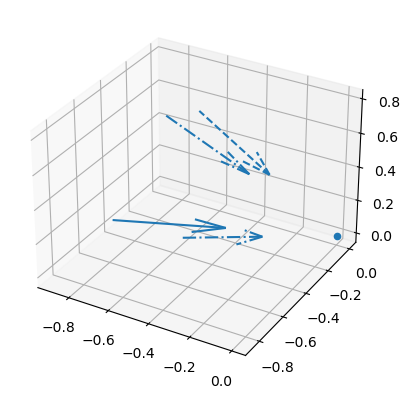

In [34]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
value_0448 = [0.2764, 0.8506, -0.4473]
value_0108 = [0.4912,0.3568,-0.7946]
value_0177 = [0.7947, 0.5774, -0.1876]
ax.quiver(*([-v for v in value_0177]), *value_0177, length=0.5, normalize=False)
ax.quiver(*([-v for v in value_0448]), *value_0448,  length=0.5, normalize=False, linestyle='-.')
ax.quiver(*[-0.8944,0,0.4473], *[0.8944,0,-0.4473],  length=0.5, normalize=False, linestyle='-.')
ax.quiver(*([-v for v in value_0108]), *value_0108, length=0.5, normalize=False, linestyle='--')


ax.scatter(0,0,0,'+')